## <font color='red'> 파일명 : 수학심화기말고사_학번_이름 ! </font>

> ### [문제 1] train.csv 데이터를 사용하여 선형회귀모델을 만들고, test.csv를 사용하여 만든 선형회귀모델의 성능을 Mean Square Error로 평가하시오.

### 1-1. train.csv 데이터를 사용하여, 독립변수를 X, 종속변수를 Y로 하는 선형회귀모델을 만들고, 회귀식을 나타내시오.</b>

회귀식: Y = 0.6293339405743734 * X + 7.063931777737807


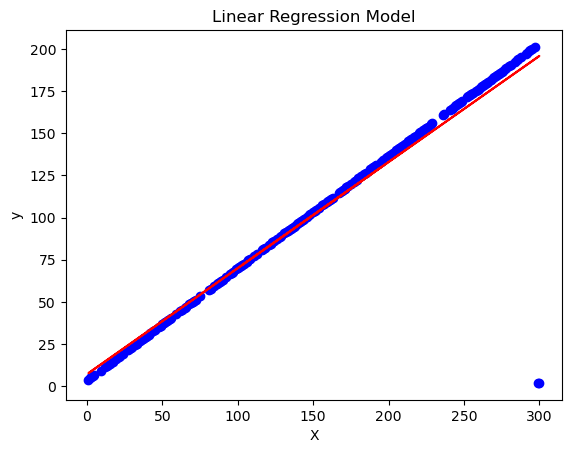

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


file_path = 'C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\train_data.csv'

data = pd.read_csv(file_path)

X = data['X'].values.reshape(-1, 1)
Y = data['Y'].values

model = LinearRegression()

model.fit(X, Y)

print("회귀식: Y =", model.coef_[0], "* X +", model.intercept_)

plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()

### 1-2. test.csv 데이터를 사용하여, 1-1에서 만든 선형회귀모델의 성능을 평가하시오. 평가지표는 Mean Square Error를 사용 </b>

회귀식: Y = 0.6293339405743734 * X + 7.063931777737807
Mean Square Error: 370.72263874011287


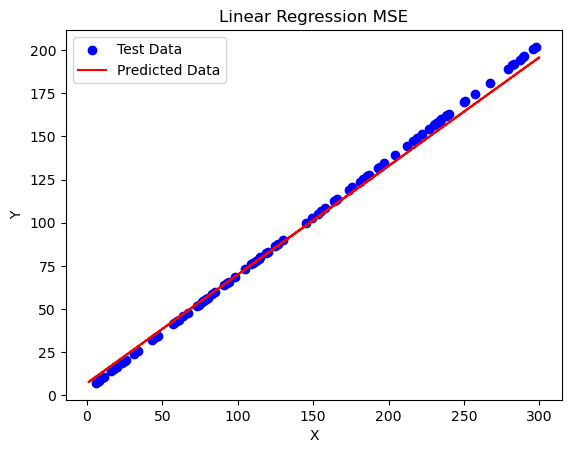

In [201]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_file_path = 'C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\train_data.csv'
train_data = pd.read_csv(train_file_path)

X_train = train_data['X'].values.reshape(-1, 1)
Y_train = train_data['Y'].values

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

mse = mean_squared_error(Y_train, Y_pred)

print("회귀식: Y =", model.coef_[0], "* X +", model.intercept_)

test_file_path = 'C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\test_data.csv'
test_data = pd.read_csv(test_file_path)

X_test = test_data['X'].values.reshape(-1, 1)
Y_test = test_data['Y'].values

print("Mean Square Error:", mse)

plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.plot(X_train, Y_pred, color='red', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression MSE')
plt.legend()
plt.show()

### 1-3. test.csv 데이터와 회귀선을 시각화하여 나타내시오. </b>

회귀식: Y = 0.6666666667244894 * X + 3.222222220786918


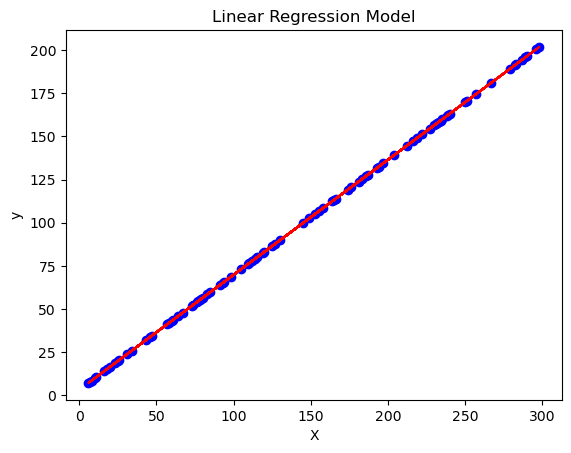

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\test_data.csv'

data = pd.read_csv(file_path)

X = data['X'].values.reshape(-1, 1)
Y = data['Y'].values

model = LinearRegression()

model.fit(X, Y)

print("회귀식: Y =", model.coef_[0], "* X +", model.intercept_)

plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()

> ### [문제 2] df 데이터를 가지고, target 값이 0인지 1인지 분류하는 로지스틱 회귀 모델을 만드시오.

df 데이터는 3가지 품종(0,1,2)의 붓꽃에 대해 꽃잎과 꽃받침의 길이와 너비를 측정한 데이터이다. <br>
품종별로 50개의 샘플(총 150개)이 있으며, 각 샘플은 꽃잎과 꽃받침의 길이와 너비를 나타내는 네 가지 특성으로 구성된다. <br>

본 문제에서는 로지스틱 회귀 모델을 사용하여 꽃잎과 꽃받침의 길이, 너비 데이터를 가지고 붓꽃의 품종(0 또는 1)을 예측하고자 한다.

In [203]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2-1. target 값을 0과 1로만 갖도록(target 값이 2인 데이터를 제거) df 데이터를 수정하시오.

In [204]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df_filtered = df[df['target'].isin([0, 1])].copy()

df_filtered.reset_index(drop=True, inplace=True)

df_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


### 2-2. 종속변수를 target, 독립변수를 나머지 변수들로 갖도록 하고, train:test 데이터의 비율을 8:2로 분할한 뒤, train 데이터를 사용하여 로지스틱 회귀 모델을 만드시오. </b>

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df_filtered = df[df['target'].isin([0, 1])].copy()

df_filtered.reset_index(drop=True, inplace=True)

X = df_filtered.drop(columns=['target'])
y = df_filtered['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


### 2-3. test 데이터를 사용하여 2-2에서 만든 회귀 모델의 성능을 평가하시오. 평가지표는 accuracy를 사용 </b>

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 불러오기
df = pd.read_csv('C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\test_data.csv')

# 'Y' 열의 평균 값 계산
threshold = df['Y'].mean()

# 'Y' 값을 기준으로 이진 분류 수행
df['target'] = df['Y'].apply(lambda x: 1 if x > threshold else 0)

# 종속 변수와 독립 변수 지정
X = df.drop(columns=['Y', 'target'])
y = df['target']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# 훈련 및 테스트 세트 예측
train_preds = log_reg_model.predict(X_train)
test_preds = log_reg_model.predict(X_test)

# 정확도 계산
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# 결과 출력
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


### 2-4. 2-2에서 만든 회귀 모델을 가지고, 아래 표과 같은 특성을 갖는 붓꽃의 품종(0 or 1)을 예측하시오. </b><br>

<table>
    <tr>
        <td>sepal length (cm)</td>
        <td>5.0</td>
    </tr>
    <tr>
        <td>sepal width (cm)</td>
        <td>2.0</td>
    </tr>
    <tr>
        <td>petal length (cm)</td>
        <td>3.5</td>
    </tr>
    <tr>
        <td>petal width (cm)</td>
        <td>1.0</td>
    </tr>
</table>

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df_filtered = df[df['target'].isin([0, 1])].copy()

df_filtered.reset_index(drop=True, inplace=True)

X = df_filtered.drop(columns=['target'])
y = df_filtered['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

new_data_point = [[5.0, 2.0, 3.5, 1.0]]

predicted_class = log_reg_model.predict(new_data_point)

print("Predicted Class:", predicted_class)

Predicted Class: [1]


c:\Users\brigh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


> ### [문제 3] sale.csv 데이터와 나이브베이즈 이론을 사용하여, 아래 표와 같은 사람의 물건구매여부(Yes or No)를 예측하시오.

<br>
<center></center>
<table>
    <tr>
        <td>나이</td>
        <td>30대</td>
    </tr>
    <tr>
        <td>소득</td>
        <td>중</td>
    </tr>
    <tr>
        <td>기혼여부</td>
        <td>O</td>
    </tr>
</table>

In [208]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB

file_path = 'C:\\Users\\brigh\\git\\brightgu.github.io\\my_note2\\sale.csv'
data = pd.read_csv(file_path)

condition = (data['나이'] == '30대') & (data['소득'] == '중') & (data['기혼여부'] == 'O')
filtered_data = data[condition]

X = filtered_data[['No']]
y = filtered_data['물건구매여부']

X['No'] = X['No'].apply(lambda x:1 if x == 1 else 0)

model = BernoulliNB()
model.fit(X, y)

prediction = model.predict([[1]])

print("물건 구매 여부:", prediction[0])

물건 구매 여부: No


C:\Users\brigh\AppData\Local\Temp\ipykernel_22276\3905942218.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['No'] = X['No'].apply(lambda x:1 if x == 1 else 0)
c:\Users\brigh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


> ### [문제 4] 아래의 표는 변수 3개, 관측치 5개로 구성된 데이터 X이다. 아래의 데이터를 가지고 주성분이 1일 때, 주성분 벡터를 구하여라. 

|구분|n1|n2|n3|n4|n5|
|---|--|--|--|--|--|
|<b>P1</b>|0.2|0.45|0.33|0.54|0.77|
|<b>P2</b>|5.6|5.89|6.37|7.9|7.87|
|<b>P3</b>|3.56|2.4|1.95|1.32|0.98|

In [209]:
import numpy as np

X = np.array([
    [0.2, 0.45, 0.33, 0.54, 0.77],
    [5.6, 5.89, 6.37, 7.9, 7.87],
    [3.56, 2.4, 1.95, 1.32, 0.98]
])

### 4-1. 데이터 X를 변수별 평균 0으로 centering 한 데이터 X'을 구하시오. </b>

In [210]:
import numpy as np

X = np.array([
    [0.2, 0.45, 0.33, 0.54, 0.77],
    [5.6, 5.89, 6.37, 7.9, 7.87],
    [3.56, 2.4, 1.95, 1.32, 0.98]
])

means = np.mean(X, axis=1)

X_centered = X - means.reshape(-1, 1)

print("변수별 평균:")
print(means)
print("\nCentering된 데이터:")
print(X_centered)

변수별 평균:
[0.458 6.726 2.042]

Centering된 데이터:
[[-0.258 -0.008 -0.128  0.082  0.312]
 [-1.126 -0.836 -0.356  1.174  1.144]
 [ 1.518  0.358 -0.092 -0.722 -1.062]]


### 4-2. 데이터 X'의 공분산행렬 cov를 구하시오. </b>

In [211]:
cov = np.cov(X_centered)

print("공분산 행렬:")
print(cov)

공분산 행렬:
[[ 0.04677  0.19899 -0.19332]
 [ 0.19899  1.19513 -1.00959]
 [-0.19332 -1.00959  1.02252]]


### 4-3. cov의 고유값과 고유벡터를 구하시오. </b>

In [212]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print("고유값:")
print(eigenvalues)
print("\n고유벡터:")
print(eigenvectors)

고유값:
[2.15851707 0.00965097 0.09625196]

고유벡터:
[[ 0.13020816  0.98747924 -0.08905388]
 [ 0.73000041 -0.03470143  0.68256517]
 [-0.67092863  0.15388492  0.72537866]]


### 4-4. 주성분을 1로 설정하고자 할 때, cov의 고유벡터를 출력하시오. </b>

In [213]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

max_eigenvalue_index = np.argmax(eigenvalues)

principal_component = eigenvectors[:, max_eigenvalue_index]

principal_component /= np.linalg.norm(principal_component)

print("주성분:")
print(principal_component)

주성분:
[ 0.13020816  0.73000041 -0.67092863]


### 4-5. 4-4에서 선택한 고유벡터를 가지고, X'을 새 좌표로 변환하여 주성분 벡터를 구하시오. </b>

In [214]:
new_coordinates = np.dot(X_centered.T, principal_component)

print("주성분 벡터:")
print(new_coordinates)

주성분 벡터:
[-1.87404384 -0.85151446 -0.21482136  1.35210803  1.58827163]


### 4-6. scikit-learn의 PCA 라이브러리를 사용하여, 데이터 X'의 주성분이 1일 때의 주성분 벡터를 구하고, 4-5의 결과와 비교하시오. </b>

In [215]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X_centered.T)
principal_component_sklearn = pca.components_

print("4-5")
print(new_coordinates)
print("\nPCA를 사용한 주성분 벡터:")
print(principal_component_sklearn)


4-5
[-1.87404384 -0.85151446 -0.21482136  1.35210803  1.58827163]

PCA를 사용한 주성분 벡터:
[[-0.13020816 -0.73000041  0.67092863]]
